In [52]:
from ipynb.fs.full.Util import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score,roc_curve,precision_score,f1_score,auc,accuracy_score

In [2]:
# !pip install ipynb

In [3]:
#pip install --upgrade scikit-learn

In [4]:
#load data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [6]:
print(train.head())
print(test.head())

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

In [7]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None


In [8]:
#checking data types
print(train.dtypes)
print(test.dtypes)

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object
ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object


In [9]:
train.describe(include="all")

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
unique,200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train_14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,NaN,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,NaN,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,NaN,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,NaN,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,NaN,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800


In [10]:
test.describe(include="all")

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
unique,200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,test_1643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,NaN,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,NaN,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,NaN,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,NaN,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,NaN,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400


Text(0.5, 0, 'Target')

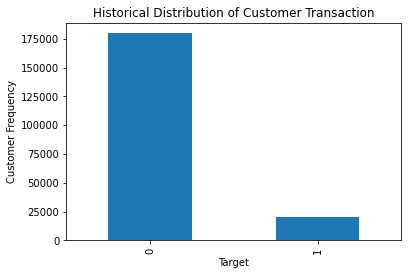

In [60]:
train['target'].value_counts().plot(kind='bar')
plt.title("Historical Distribution of Customer Transaction")
plt.ylabel("Customer Frequency")
plt.xlabel("Target")

In [64]:
print('~> % of where target = 0:\n   {}%'.format(100 - round(train['target'].mean()*100, 2)))
print('\n~> % of where target = 1:\n   {}%'.format(round(train['target'].mean()*100, 2)))

~> % of where target = 0:
   89.95%

~> % of where target = 1:
   10.05%


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

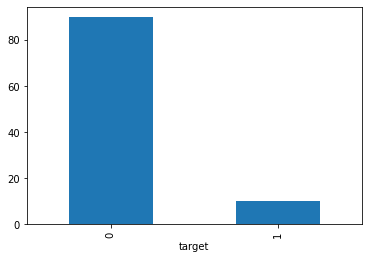

In [63]:
train_df = (train.groupby('target').size().sort_values(ascending=False) / train.groupby('target').size().sort_values(ascending=False).sum())*100
ax = train_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

<p> Imbalanced dataset is observed

## Checking if any missing values

In [12]:
train.isna().sum().sum(),test.isna().sum().sum()

(0, 0)

## Checking the distribution (mean, standard deviation, skewness, kurtosis) of train dataset
<p> Plotting a histogram of the mean values for each record based on the target variable

In [13]:
columns=train.columns[2:]
target0 = train[train['target']==0]
target1= train[train['target']==1]

Text(0.5, 1.0, 'Mean Frequency')

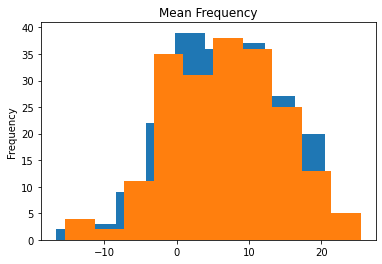

In [14]:
target0[columns].mean().plot(kind='hist')
target1[columns].mean().plot(kind='hist')
plt.title('Mean Frequency')

<p> Above figure shows depicts a small variation in the mean of all features that could explain the target variable and their histograms have a shape like the one of a normal distribution

Text(0.5, 1.0, 'Standard Deviation Frequency')

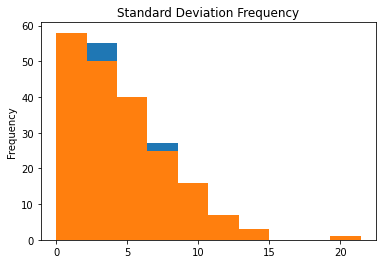

In [15]:
target0[columns].std().plot(kind='hist')
target1[columns].std().plot(kind='hist')
plt.title('Standard Deviation Frequency')

<p> Above figure shows depicts a small variation in the mean of all features that could explain the target variable.

Text(0.5, 1.0, 'Skewness Frequency')

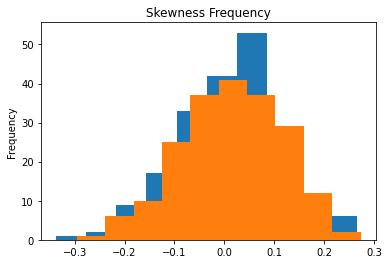

In [16]:
target0[columns].skew().plot(kind='hist')
target1[columns].skew().plot(kind='hist')
plt.title('Skewness Frequency')

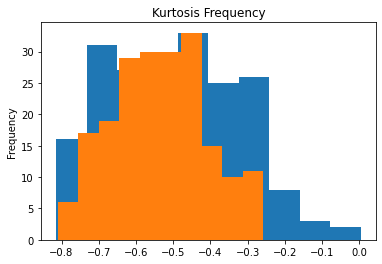

In [17]:
target0[columns].kurt().plot(kind='hist');
target1[columns].kurt().plot(kind='hist');
plt.title('Kurtosis Frequency');

<p> Both Skewness and Kurtosis show that the features distributions are like a normal one.

## Looking at Correlation 

<AxesSubplot:>

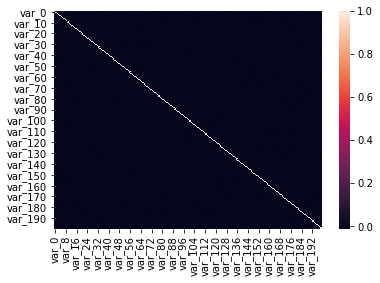

In [18]:
corr_matrix = train[columns].corr()
sns.heatmap(corr_matrix)

<p> From above figure we conlcude that all 200 features show a low correlation (<.2) with each other. Let us look at the correlation numerically too

In [19]:
corr = train.corr()
high_corr = np.where(corr>0.5)
high_corr = [(corr(x),corr(y)) for x,y in zip(*high_corr) if x!=y and x<y]
if len(high_corr)==0:
    print("There are no correlated variables")

There are no correlated variables


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

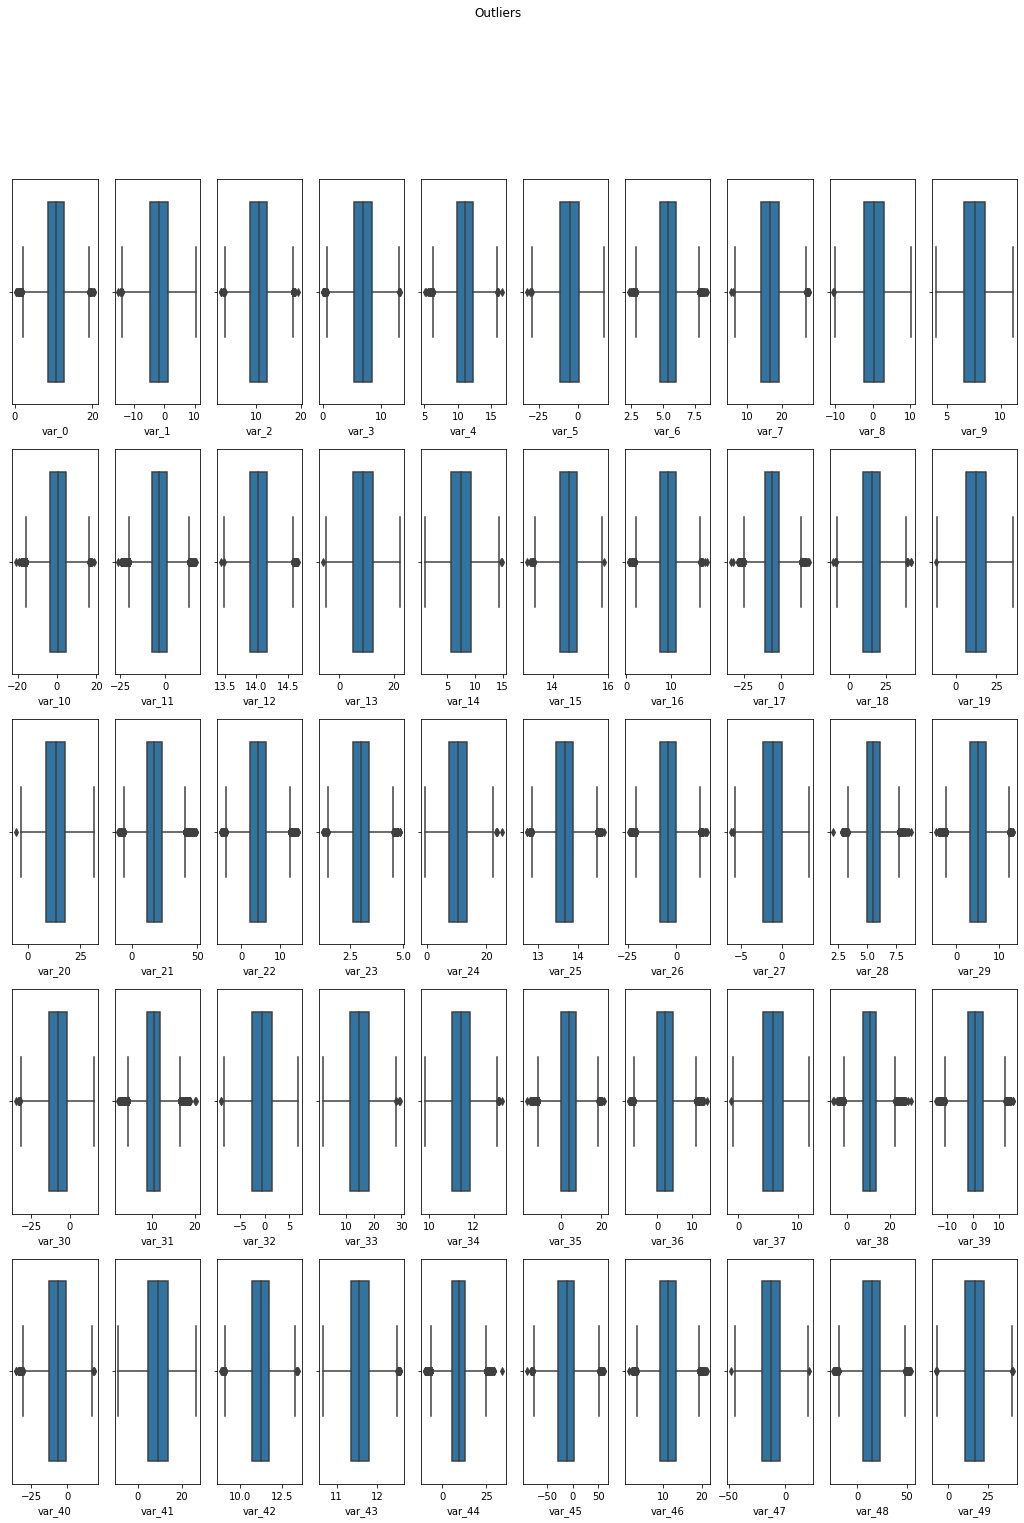

In [20]:
boxplot_func(train,columns[:50])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

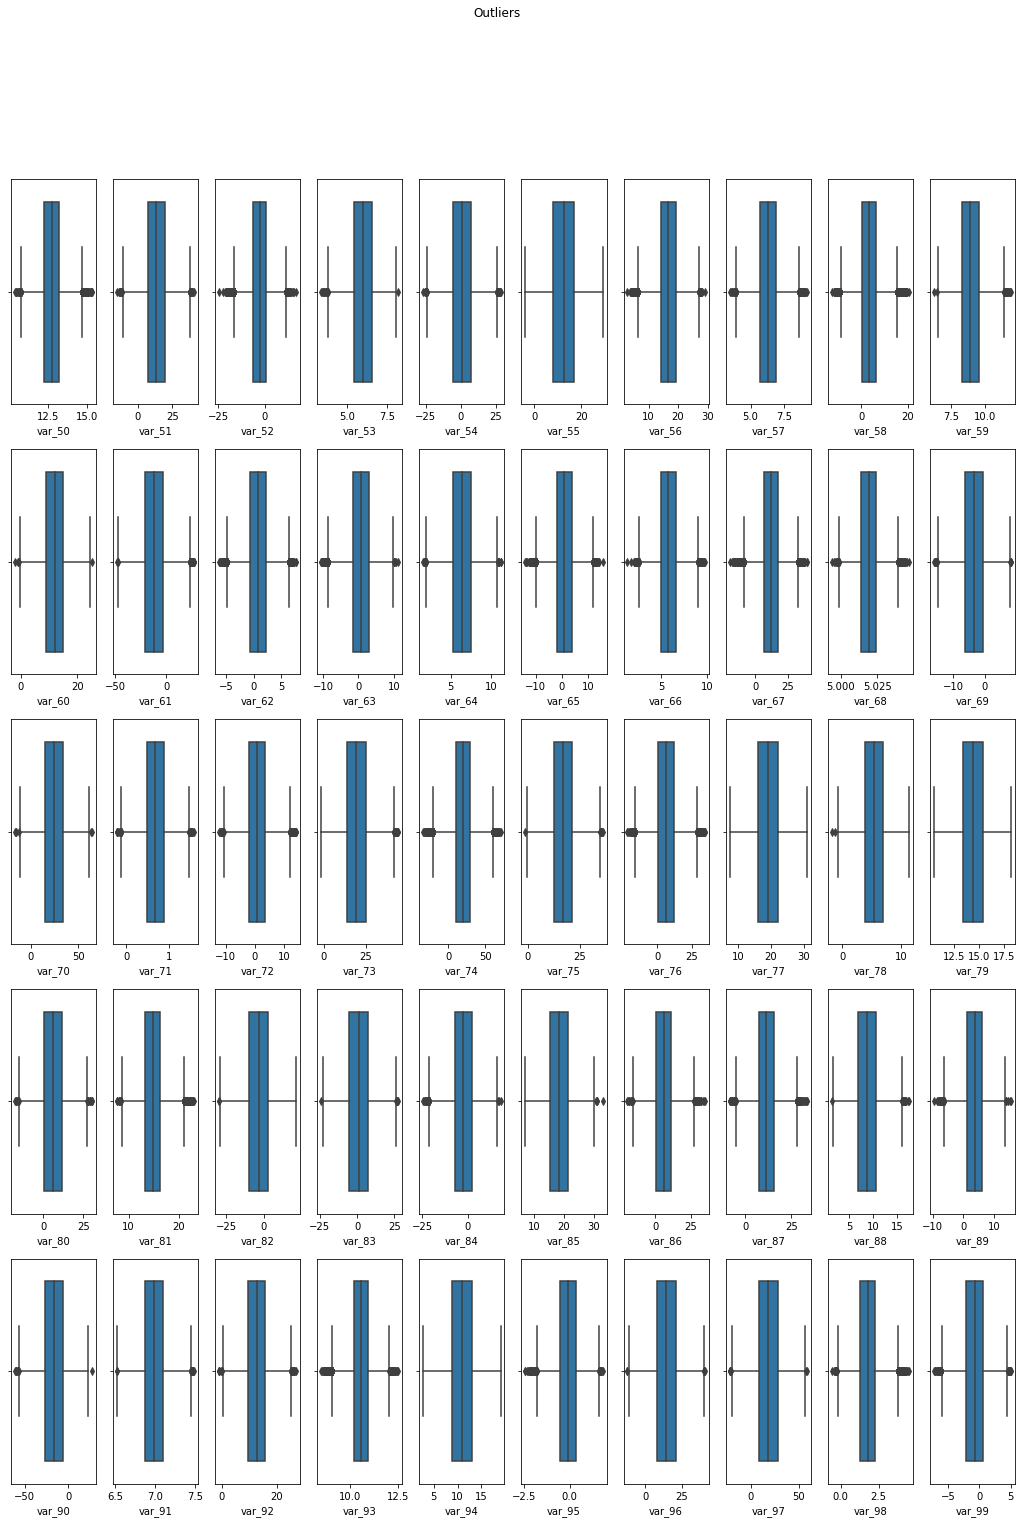

In [21]:
boxplot_func(train,columns[50:100])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

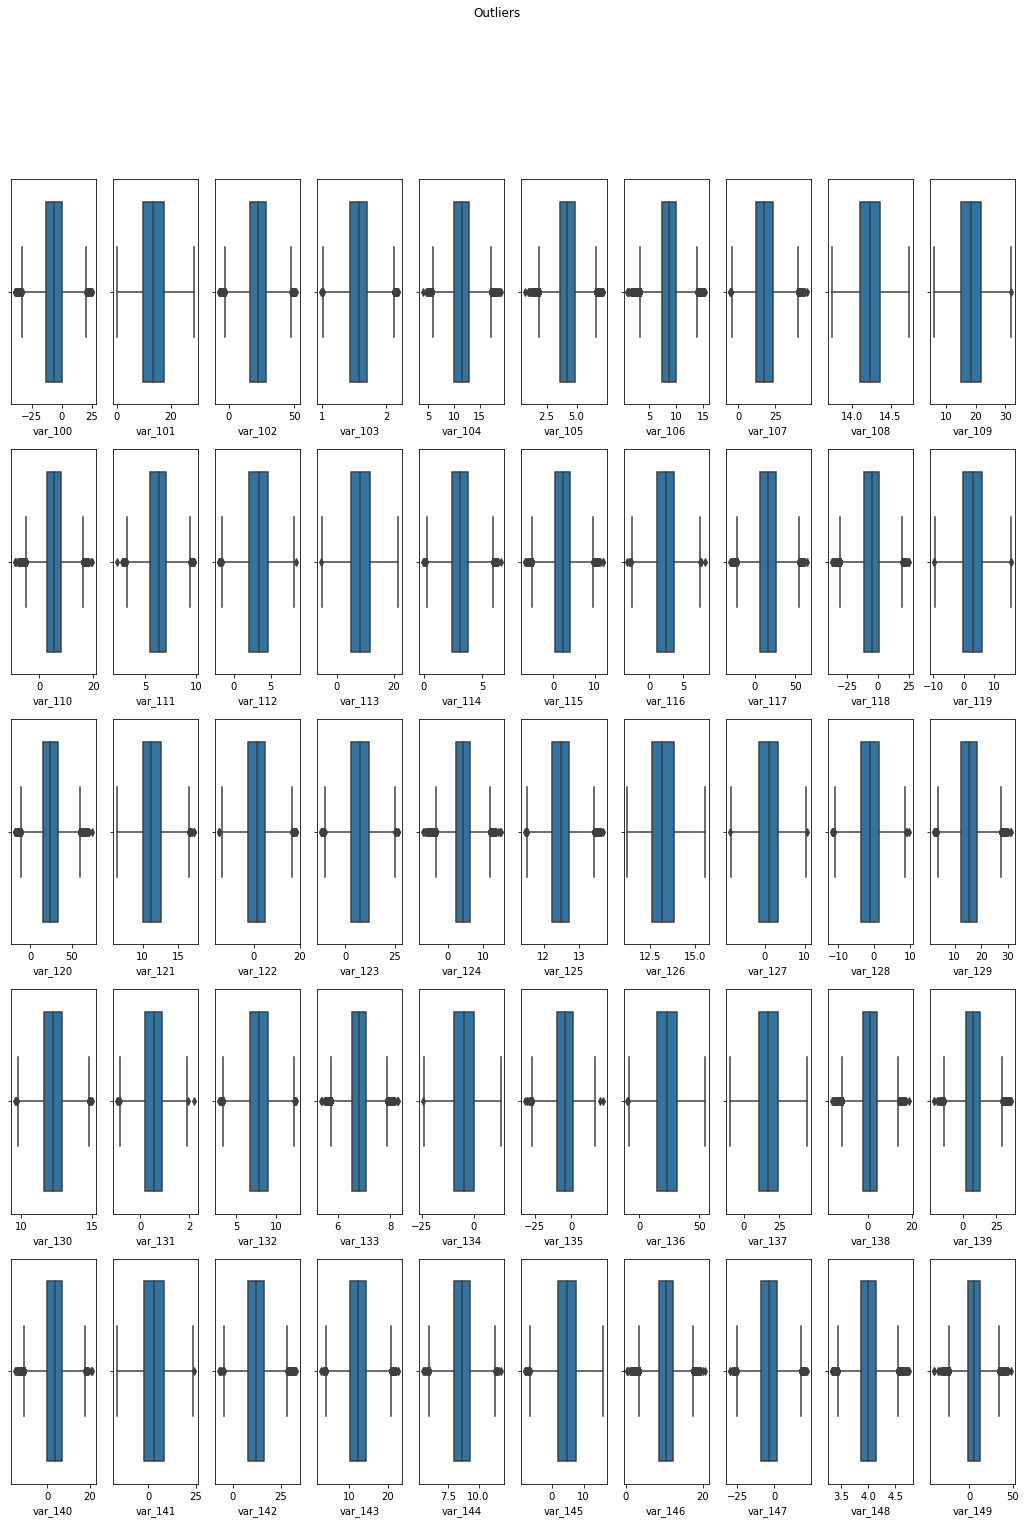

In [22]:
boxplot_func(train,columns[100:150])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

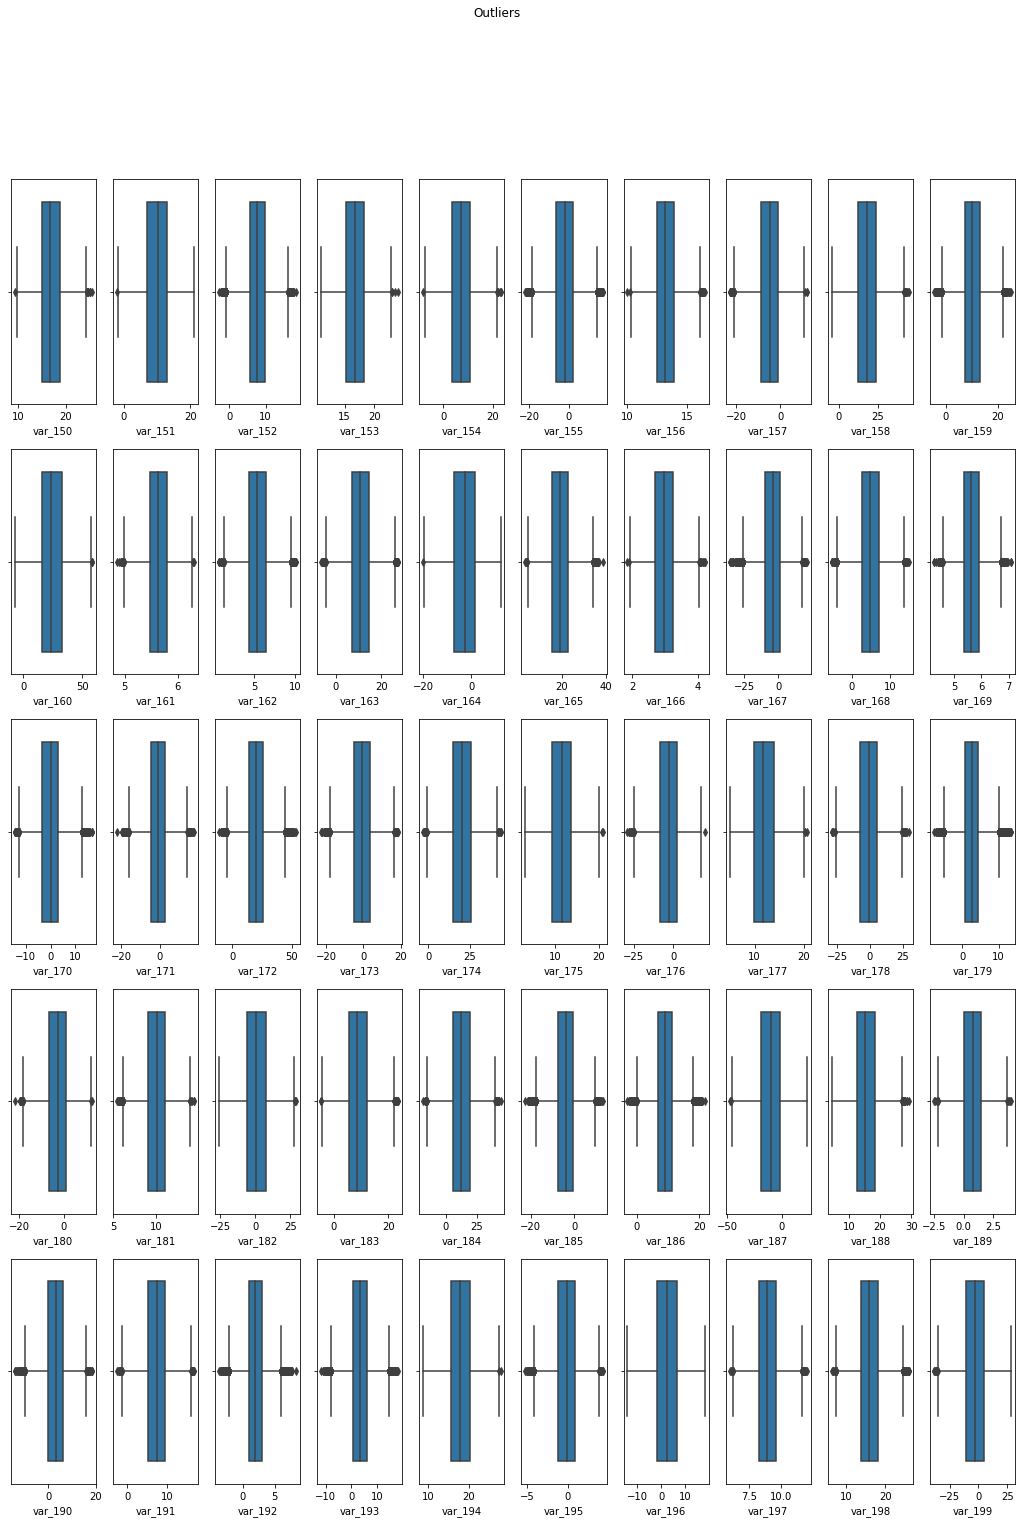

In [23]:
boxplot_func(train,columns[150:200])

In [24]:
columns=train.columns[2:]
train = remove_Outliers(train,columns)

Old Shape:  (200000, 202)
New Shape:  (199896, 202)
Total number of observations dropped in train set: 104


### Rechecking the distribution of train data after outlier removal

<AxesSubplot:>

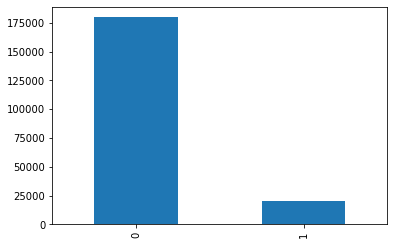

In [25]:
train['target'].value_counts().plot(kind='bar')

In [26]:
train['target'].value_counts()

0    179813
1     20083
Name: target, dtype: int64

### Data transformation to normalise the values across all input variables

In [27]:
std_scaler = StandardScaler()
std_scaler.fit(train[columns].values) 
std_scaler.fit(test[columns].values) 
train_std_df = pd.DataFrame(std_scaler.transform(train[columns].values), columns=columns)
test_std_df = pd.DataFrame(std_scaler.transform(test[columns].values) , columns=columns)

train_std_df['target'] = train['target'].values
train_std_df[columns].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,...,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000,199896.000000
mean,0.006805,-0.000866,0.002921,0.003973,0.001215,-0.001870,-0.007229,0.004799,0.002164,-0.001734,...,0.009793,-0.006553,0.001352,0.002370,-0.000961,-0.005901,0.002223,-0.004630,0.000526,-0.007769
std,0.999113,1.002391,1.002638,0.995419,1.004114,0.999196,1.002229,0.998091,0.999769,1.002649,...,1.001922,0.999352,0.998979,0.999082,0.998226,0.999758,1.001506,1.000790,1.000814,1.003833
min,-2.849908,-3.321163,-3.261480,-3.326522,-3.712822,-3.496135,-3.547960,-3.264573,-3.234758,-2.921517,...,-3.797451,-3.355160,-3.878777,-3.780523,-2.961993,-3.586371,-3.029654,-3.205366,-3.180727,-3.424171
25%,-0.725708,-0.771187,-0.753622,-0.747503,-0.738221,-0.781517,-0.748903,-0.754997,-0.778383,-0.771683,...,-0.713805,-0.760547,-0.700200,-0.685109,-0.753593,-0.725440,-0.778230,-0.716285,-0.677901,-0.765914
50%,-0.044205,0.003995,-0.048370,0.017848,0.019797,0.027685,-0.034885,-0.021198,0.034969,0.048944,...,0.003007,-0.036550,-0.016584,0.018479,-0.012344,-0.027309,0.021574,-0.026309,0.021643,0.040789
75%,0.690876,0.738261,0.686847,0.748172,0.733026,0.759340,0.679827,0.751432,0.798229,0.824031,...,0.706679,0.678953,0.691677,0.721717,0.764089,0.673760,0.783248,0.739462,0.729895,0.777333
max,2.817117,2.970188,3.282436,3.117859,3.461285,2.834081,3.507103,3.259671,2.962220,2.907137,...,3.350993,3.060388,4.376095,3.744075,3.162355,3.082210,2.943376,3.353204,3.393454,3.053022


### Applying Sampling techniques

#### 1. Under Sampling 

In [28]:
target0,target1 = train_std_df['target'].value_counts()
df_target0 = train_std_df[train_std_df['target']==0]
df_target1 = train_std_df[train_std_df['target']==1]
df_US = df_target0.sample(target1)
df_train_US = pd.concat([df_US,df_target1],axis=0)
print(df_train_US.target.value_counts())
df_train_US.describe()

1    20083
0    20083
Name: target, dtype: int64


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
count,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,...,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000,40166.000000
mean,0.082772,0.068038,0.077680,0.015357,0.008436,0.037713,0.084042,0.001944,0.027392,-0.054385,...,0.063416,-0.055907,-0.023198,-0.039706,0.029479,0.034420,-0.048356,-0.069974,0.023271,0.500000
std,1.036509,1.023418,1.040945,1.001557,1.008012,1.018746,1.035339,0.998442,1.000046,1.023444,...,1.030240,1.000628,1.005739,1.005898,1.017284,1.012141,1.018349,1.040781,1.005676,0.500006
min,-2.849908,-3.085450,-3.261480,-3.124741,-3.217045,-3.045102,-3.547960,-2.903963,-3.034840,-2.746498,...,-3.239894,-3.552823,-3.780523,-2.894172,-3.586371,-2.994915,-3.033361,-3.094511,-3.424171,0.000000
25%,-0.686364,-0.711776,-0.717013,-0.734776,-0.736164,-0.757089,-0.694316,-0.762816,-0.748248,-0.825666,...,-0.718748,-0.763073,-0.708554,-0.791435,-0.708513,-0.747907,-0.755676,-0.762539,-0.732535,0.000000
50%,0.024768,0.073108,0.030164,0.031659,0.021127,0.063641,0.071686,-0.021213,0.062914,0.001130,...,0.040272,-0.087464,-0.012493,-0.054739,0.006230,0.057727,-0.067736,-0.053323,0.075409,0.500000
75%,0.785567,0.807918,0.766036,0.757489,0.743357,0.798162,0.794436,0.741437,0.819371,0.780743,...,0.758460,0.633297,0.704248,0.728125,0.721305,0.818753,0.707862,0.691307,0.811881,1.000000
max,2.812540,2.918289,3.016327,2.962796,2.941814,2.790329,3.319173,3.173614,2.962220,2.901373,...,2.995599,3.866082,3.650672,2.960645,2.952949,2.943376,3.171317,3.319668,3.053022,1.000000


#### 2. Over Sampling 

In [29]:
df_OS = resample(df_target1, replace=True, n_samples=179813,random_state=123)

df_train_OS = pd.concat([df_OS,df_target0],axis=0)

len(df_train_OS)
print(df_train_OS['target'].value_counts())
df_train_OS.describe()

1    179813
0    179813
Name: target, dtype: int64


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
count,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,...,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000,359626.000000
mean,0.078257,0.069453,0.078475,0.019237,0.012816,0.037262,0.082860,0.001225,0.027400,-0.059249,...,0.056388,-0.056357,-0.023055,-0.033372,0.030835,0.034492,-0.052565,-0.070350,0.023762,0.500000
std,1.035735,1.024495,1.041165,1.001015,1.012594,1.015764,1.036122,0.997665,1.001311,1.020071,...,1.030756,1.002537,1.009213,1.006895,1.017088,1.010185,1.016974,1.041699,1.005007,0.500001
min,-2.849908,-3.321163,-3.261480,-3.326522,-3.712822,-3.496135,-3.547960,-3.264573,-3.234758,-2.921517,...,-3.355160,-3.878777,-3.780523,-2.961993,-3.586371,-3.029654,-3.205366,-3.180727,-3.424171,0.000000
25%,-0.688521,-0.713663,-0.715086,-0.731622,-0.735252,-0.750287,-0.691656,-0.763422,-0.749845,-0.830294,...,-0.725963,-0.767262,-0.713291,-0.785935,-0.705086,-0.745267,-0.762109,-0.765672,-0.729193,0.000000
50%,0.023829,0.075237,0.031379,0.034582,0.027468,0.067828,0.071281,-0.027258,0.062209,-0.002523,...,0.030851,-0.088985,-0.006261,-0.045776,0.006265,0.056717,-0.070614,-0.052143,0.073197,0.500000
75%,0.776404,0.815257,0.773363,0.760192,0.749234,0.796485,0.795014,0.742934,0.822941,0.772970,...,0.750973,0.634648,0.705499,0.736897,0.720903,0.815944,0.706234,0.692537,0.814871,1.000000
max,2.817117,2.970188,3.282436,3.117859,3.461285,2.834081,3.507103,3.259671,2.962220,2.907137,...,3.060388,4.376095,3.744075,3.162355,3.082210,2.943376,3.353204,3.393454,3.053022,1.000000


In [ ]:
#### 3. Over Sampling using SMOTE

In [30]:
# import imblearn
# from imblearn.over_sampling import SMOTE
# #SMOTE:-
# sm = SMOTE(random_state=42, ratio=1.0)
# #Generating synthetic data points
# X_train_OS,y_train_OS=sm.fit_sample(X_train,y_train)
# X_test_OS,y_test_OS=sm.fit_sample(X_test,y_test)

### Model Validation

In [31]:
names = [
    "Neural Net",
    "AdaBoost",
    "LDA",
    "QDA",
]

In [32]:
classifiers = [
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]


#### Splitting the train dataset(normalized) into test and train dataset using Stratified KFold technique

In [33]:
X_train,X_test,y_train,y_test=train_test_split_func(df_train_US,'target')

Shape of X_train : (32133, 200)
Shape of X_test : (8033, 200)
Shape of y_train : (32133,)
Shape of y_test : (8033,)


#### Model Validation using undersampled dataset

########## Model Validation for Neural Net  ##########
Training Metrics of Neural Net
Confusion Matrix
[[14735  1332]
 [ 1480 14586]]
Accuracy: 0.9124887187626428
Precision: 0.916321145872597
F1 Score: 0.9120810405202601
Recall: 0.9078799950205403


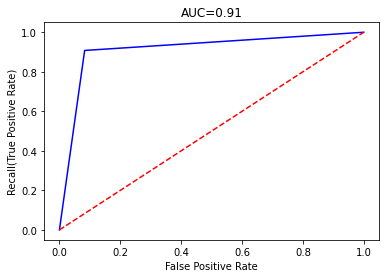

Testing Metrics of Neural Net
Confusion Matrix
[[3025  991]
 [ 975 3042]]
Accuracy: 0.7552595543383542
Precision: 0.7542772129928094
F1 Score: 0.755776397515528
Recall: 0.7572815533980582


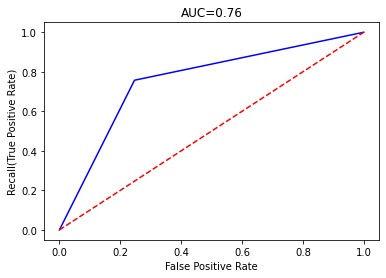

########## Model Validation for AdaBoost  ##########
Training Metrics of AdaBoost
Confusion Matrix
[[12170  3897]
 [ 4504 11562]]
Accuracy: 0.7385553792051784
Precision: 0.7479138366000389
F1 Score: 0.7335130848532911
Recall: 0.7196564172787253


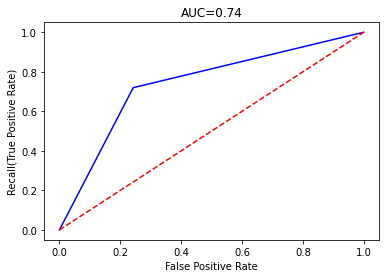

Testing Metrics of AdaBoost
Confusion Matrix
[[2977 1039]
 [1173 2844]]
Accuracy: 0.7246358770073447
Precision: 0.7324233839814577
F1 Score: 0.72
Recall: 0.7079910380881255


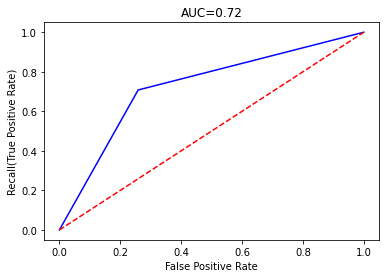

########## Model Validation for LDA  ##########
Training Metrics of LDA
Confusion Matrix
[[12664  3403]
 [ 3584 12482]]
Accuracy: 0.7825599850620857
Precision: 0.785772741580107
F1 Score: 0.7813213983912867
Recall: 0.7769202041578489


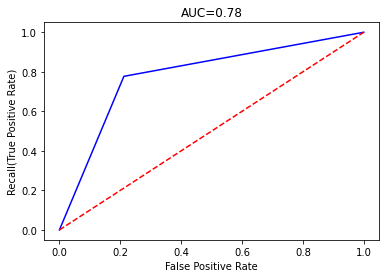

Testing Metrics of LDA
Confusion Matrix
[[3113  903]
 [ 895 3122]]
Accuracy: 0.776173285198556
Precision: 0.7756521739130435
F1 Score: 0.7764237751803034
Recall: 0.7771969131192432


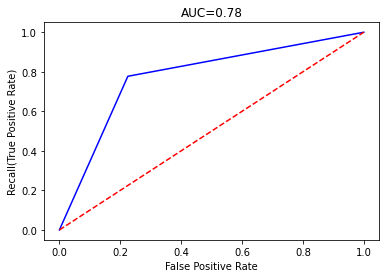

########## Model Validation for QDA  ##########
Training Metrics of QDA
Confusion Matrix
[[14237  1830]
 [ 1993 14073]]
Accuracy: 0.8810257367815019
Precision: 0.8849273721939257
F1 Score: 0.8804154024210954
Recall: 0.875949209510768


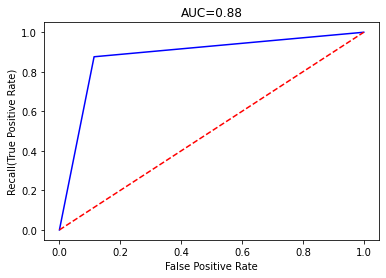

Testing Metrics of QDA
Confusion Matrix
[[2936 1080]
 [1015 3002]]
Accuracy: 0.7392007967135565
Precision: 0.7354238118569328
F1 Score: 0.7413260896406964
Recall: 0.7473238735374658


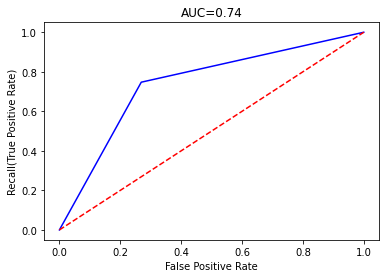

In [34]:
model_name_US, model_US=model_validation(names,classifiers,X_train,X_test,y_train,y_test)

In [35]:
model_name_US, model_US

('QDA', QuadraticDiscriminantAnalysis())

In [39]:
X_train,X_test,y_train,y_test=train_test_split_func(df_train_OS,'target')

Shape of X_train : (287701, 200)
Shape of X_test : (71925, 200)
Shape of y_train : (287701,)
Shape of y_test : (71925,)


#### Model Validation using oversampled dataset

########## Model Validation for Neural Net  ##########
Training Metrics of Neural Net
Confusion Matrix
[[118833  25017]
 [ 23064 120787]]
Accuracy: 0.8328785788022982
Precision: 0.8284203451208472
F1 Score: 0.8340059726226028
Recall: 0.8396674336639995


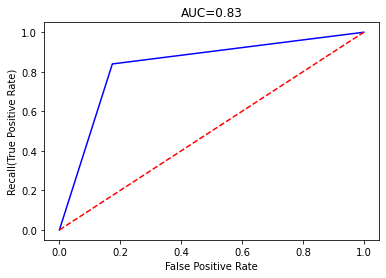

Testing Metrics of Neural Net
Confusion Matrix
[[29155  6808]
 [ 6206 29756]]
Accuracy: 0.8190615224191866
Precision: 0.813805929329395
F1 Score: 0.8205609022971071
Recall: 0.8274289527834937


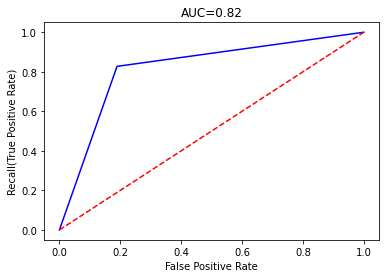

########## Model Validation for AdaBoost  ##########
Training Metrics of AdaBoost
Confusion Matrix
[[109504  34346]
 [ 40817 103034]]
Accuracy: 0.7387461287934348
Precision: 0.7499927209200757
F1 Score: 0.7327357225910373
Recall: 0.7162550138685168


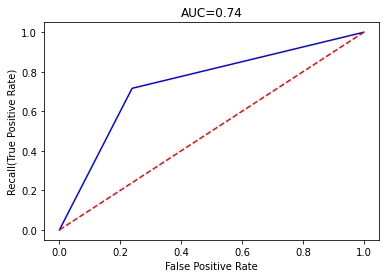

Testing Metrics of AdaBoost
Confusion Matrix
[[27333  8630]
 [10385 25577]]
Accuracy: 0.7356273896419881
Precision: 0.7477124565147485
F1 Score: 0.7290113867947384
Recall: 0.71122295756632


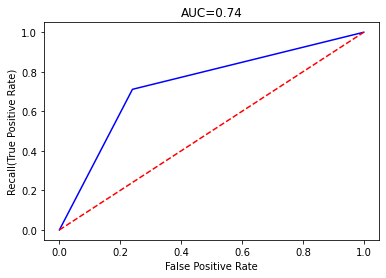

########## Model Validation for LDA  ##########
Training Metrics of LDA
Confusion Matrix
[[112888  30962]
 [ 31993 111858]]
Accuracy: 0.7811790713275241
Precision: 0.7832096345049713
F1 Score: 0.7803928545266176
Recall: 0.7775962627997025


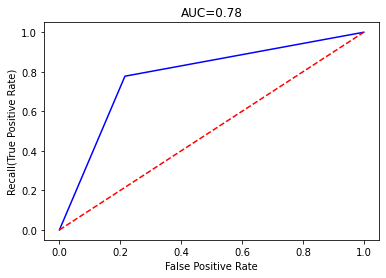

Testing Metrics of LDA
Confusion Matrix
[[28180  7783]
 [ 7993 27969]]
Accuracy: 0.7806604101494612
Precision: 0.7823058849854554
F1 Score: 0.7800150598209554
Recall: 0.7777376119236973


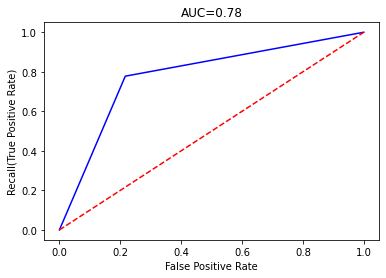

########## Model Validation for QDA  ##########
Training Metrics of QDA
Confusion Matrix
[[122564  21286]
 [ 22921 120930]]
Accuracy: 0.8463439473620182
Precision: 0.850326264274062
F1 Score: 0.8454662718873551
Recall: 0.8406615178205227


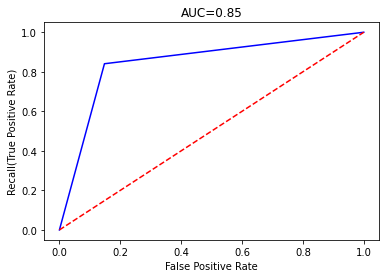

Testing Metrics of QDA
Confusion Matrix
[[29908  6055]
 [ 6346 29616]]
Accuracy: 0.8275842891901286
Precision: 0.8302542681730257
F1 Score: 0.8268814652464647
Recall: 0.8235359546187643


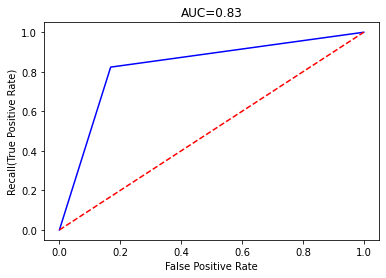

In [40]:
model_name_OS, model_OS=model_validation(names,classifiers,X_train,X_test,y_train,y_test)

In [41]:
model_name_OS, model_OS

('QDA', QuadraticDiscriminantAnalysis())

### Feature Importances (looking at top 30 features)

In [45]:
def plotImpFeatures(model,columns,ModelName):
    fig = plt.figure()

    #Important Features
    if ModelName!="QDA":
        feature_imp = pd.Series(model.feature_importances_,index=columns).sort_values(ascending=False)
        print("Important model Features:\n",feature_imp)

        plt.figure(figsize=(15,15))
        sns.barplot(x=feature_imp, y=feature_imp.index)
        # Add labels to your graph
        plt.title("Feature Importances")
        plt.ylabel("Features")
        plt.xlabel("Importances")
        plt.show()
    else:
        imp = permutation_importance(model, X_test, y_test)
        importances = imp.importances_mean
        std = imp.importances_std
        indices = np.argsort(importances)[::-1]
        feature = pd.DataFrame({"imp":importances,"col":columns})
        feature = feature.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
        feature.plot(kind='barh',x='col',y='imp',figsize=(10,7),legend=None)
        plt.title("Feature Importances")
        plt.ylabel("Features")
        plt.xlabel("Importances")
        plt.show()

<Figure size 432x288 with 0 Axes>

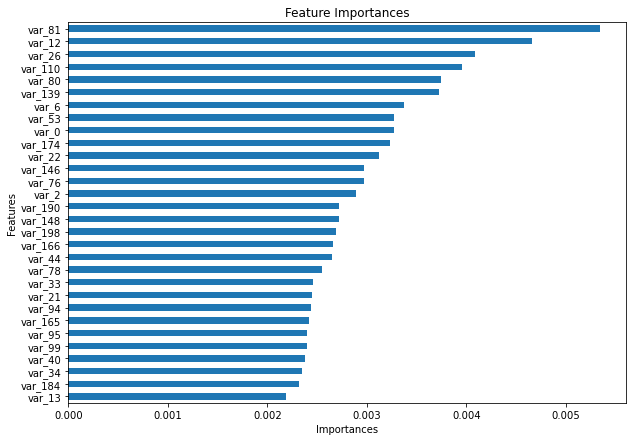

In [46]:
plotImpFeatures(model_OS,columns,"QDA")

### Making Predictions using test dataset

In [48]:
test_std_df.drop(['ID_code'],axis=1,inplace=True)
predictions = model_OS.predict(test_std_df)

Text(0.5, 0, 'Target')

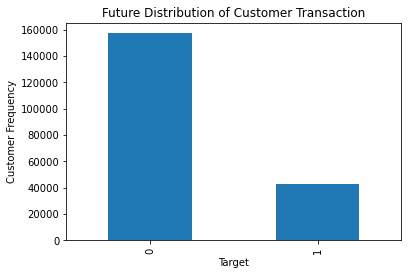

In [59]:
pd.Series(predictions).value_counts().plot(kind='bar')
plt.title("Future Distribution of Customer Transaction")
plt.ylabel("Customer Frequency")
plt.xlabel("Target")

### Export the selected model (for deployment)

In [55]:
#Export the selected model
filename = 'QDA_model.pkl'
pickle.dump(model_OS, open(filename, 'wb'))

model_final = pickle.load(open('QDA_model.pkl','rb'))
print(model_final.predict(test_std_df[columns]))

[1 1 1 ... 0 0 0]


### Submission File as per the requirement

In [57]:
submission = pd.DataFrame({"ID_code": test['ID_code'].values})
submission["target"] = predictions
submission.to_csv("submission.csv", index=False)

In [68]:
pred=pd.read_csv("submission.csv")

In [70]:
print('~> % of where target = 0:\n   {}%'.format(100 - round(pred['target'].mean()*100, 2)))
print('\n~> % of where target = 1:\n   {}%'.format(round(pred['target'].mean()*100, 2)))

~> % of where target = 0:
   78.63%

~> % of where target = 1:
   21.37%


In [71]:
pred.head()

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,1
3,test_3,0
4,test_4,0
